In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
spam_data = pd.read_csv(r'C:\Users\Mihir Patel\Downloads\Oasis\Task 4\spam.csv', encoding='latin-1')

# Rename columns to avoid mismatch error and select only relevant columns
spam_data.columns = ['label', 'message', 'Unnamed_2', 'Unnamed_3', 'Unnamed_4']
spam_data = spam_data[['label', 'message']]  # Select only 'label' and 'message' columns

# Encode labels: 'spam' = 1, 'ham' = 0
spam_data['label'] = spam_data['label'].map({'spam': 1, 'ham': 0})

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(spam_data['message'], spam_data['label'], test_size=0.2, random_state=42)

# Convert text to numerical data using TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Naive Bayes model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['ham', 'spam'])

print("Model Performance:")
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", report)


Model Performance:
Accuracy: 0.9668161434977578

Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



C:\Users\Mihir Patel\AppData\Local\Temp\ipykernel_13320\3882598552.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=spam_data, x='label', palette='viridis')


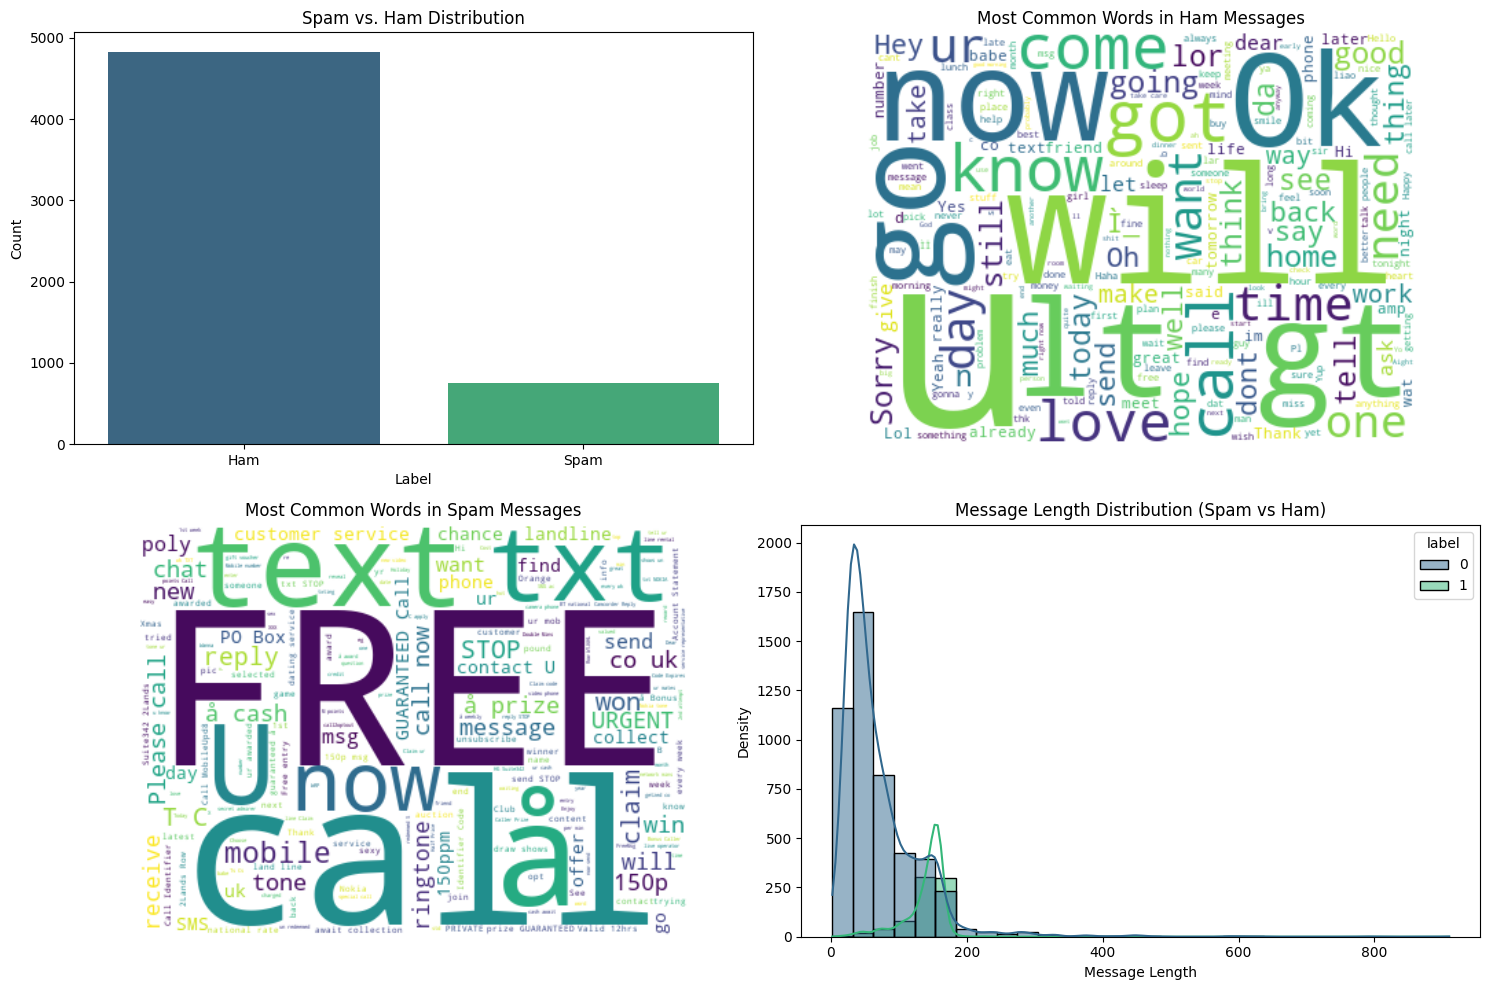

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Create a new column for message length
spam_data['message_length'] = spam_data['message'].apply(len)

# Set up the figure for subplots
plt.figure(figsize=(15, 10))

# Plot 1: Count plot of Spam vs Ham
plt.subplot(2, 2, 1)
sns.countplot(data=spam_data, x='label', palette='viridis')
plt.title('Spam vs. Ham Distribution')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.xlabel('Label')
plt.ylabel('Count')

# Plot 2: Word Cloud for Ham messages
plt.subplot(2, 2, 2)
ham_words = ' '.join(spam_data[spam_data['label'] == 0]['message'])
ham_wordcloud = WordCloud(width=400, height=300, background_color='white').generate(ham_words)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Most Common Words in Ham Messages')
plt.axis('off')

# Plot 3: Word Cloud for Spam messages
plt.subplot(2, 2, 3)
spam_words = ' '.join(spam_data[spam_data['label'] == 1]['message'])
spam_wordcloud = WordCloud(width=400, height=300, background_color='white').generate(spam_words)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Most Common Words in Spam Messages')
plt.axis('off')

# Plot 4: Message length distribution for Spam vs Ham
plt.subplot(2, 2, 4)
sns.histplot(data=spam_data, x='message_length', hue='label', kde=True, palette='viridis', bins=30)
plt.title('Message Length Distribution (Spam vs Ham)')
plt.xlabel('Message Length')
plt.ylabel('Density')

plt.tight_layout()
plt.show()
